In [ ]:
import numpy as np
import pandas as pd
import os
from pandas import read_csv

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = read_csv('boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [ ]:
array = df.values
array

In [ ]:
X = array[:,0:13]
Y = array[:,13]

# **Создаем 2 набора данных простые и стандартизированные:**

**1. Разделяем данные на наборы**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

**2. Разделяем данные на наборы стандартизованных данных**

In [ ]:
from sklearn.preprocessing import StandardScaler # стандартизируем
X_standart=StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split # разделяем стандартизованное
X_train_stand, X_test_stand, Y_train_stand, Y_test_stand = train_test_split(X_standart,Y, test_size=0.3,random_state=42)

# **Базовая регрессия (с которой будем сравнивать остральные)**

!!! Если коэффициент детерминации R**2 мал или даже отрицательный, то модель очень плоха

In [ ]:
from sklearn.dummy import DummyRegressor # импорт
dr = DummyRegressor().fit(X_train,Y_train) # создаем модель, обучаем
dr.score(X_test,Y_test) # способность предсказать данные, это R**2, т.е.
                           # процент предсказанных данных = - 3.5%, т.е. ваще никак

-0.03469753992352409

# **Линейная регрессия**

**1. Обычные данные**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,Y_train)
#LinearRegression(copy_X=True,fit_intercept=True,
#                 n_jobs=1,normalize=True)
lr.score(X_test,Y_test)

0.7112260057484974

In [ ]:
lr.coef_ # связанные коэффициенты

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [ ]:
lr.intercept_ # свободный член

31.631084035694734

**2. Стандартизированные данные**

In [ ]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression().fit(X_train_stand,Y_train_stand)
LinearRegression(copy_X=True,fit_intercept=True,
                 n_jobs=1,normalize=True)
lr2.score(X_test_stand,Y_test_stand)

0.7112260057484925

In [ ]:
lr2.coef_ # связанные коэффициенты

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

In [ ]:
lr2.intercept_ # свободный член

22.50945471291038

**3. Визуализация**

In [ ]:
!pip install yellowbrick

In [ ]:
# библиотека визуализации
from yellowbrick.features import FeatureImportances

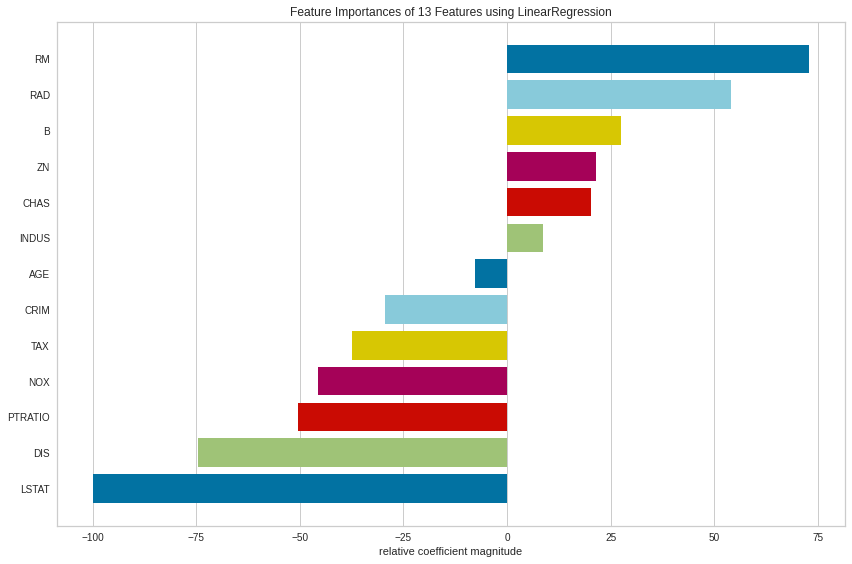

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
fi_viz = FeatureImportances(lr2, labels=df.iloc[:,0:13].columns)
fi_viz.fit (X, Y)
fi_viz.poof ()
fig .savefig("/content/gdrive/MyDrive/Colab Notebooks/наборы данных/mlpr_1401.png", bbox_inches="tight", dpi=300)


**резюме:** здесь мы видим визуализацию коэффициентов при признаках регрессии, чем больше коэффициент, тем значение признака выше

# **SVM**

In [ ]:
# разновидность линейной регрессии
# нужна стандартизация

In [ ]:
from sklearn.svm import SVR
svr = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
epsilon=0.1, gamma='auto', kernel='rbf',
max_iter=-1, shrinking=True, tol=0.001,
verbose=False).fit(X_train_stand,Y_train_stand)
svr.score(X_test_stand,Y_test_stand)

0.6553772022206866

In [ ]:
# но можно и проще
from sklearn.svm import SVR
svr = SVR().fit(X_train_stand,Y_train_stand)
svr.score(X_test_stand,Y_test_stand)

0.6551893976487939

# **К-ближайшие соседи**

In [ ]:
# нужна стандартизация

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor().fit(X_train_stand,Y_train_stand)

In [ ]:
knr.score(X_test_stand,Y_test_stand)

0.7476242635592416

# **Дерево решений**

In [ ]:
# масштабирование не обязательно
# нужно избавиться от пропущенных значений

Поскольку существуют
этапы, дерево плохо справляется с линейными отношениями
(небольшое изменение в числах, и процесс может пойти другим
путем). Дерево также сильно зависит от обучающих данных.
Небольшое изменение может изменить все дерево.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42).fit(X_train_stand,Y_train_stand)
dtr.score(X_test_stand,Y_test_stand)

0.8444833592340152

**Создаем дерево (картинка) и записывем в файл:**

In [ ]:
import pydotplus
from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
tree.export_graphviz(     dtr,
                     out_file=dot_data,
                     feature_names=df.iloc[:,0:13].columns,
                     filled=True
                     )
g = pydotplus.graph_from_dot_data(dot_data.getvalue())
g.write_png("/content/gdrive/MyDrive/Colab Notebooks/наборы данных/mlpr_1402.png")


**Создаем верхнюю часть дерева:**

In [ ]:
# max_depth=2 - выводит только верхнюю часть дерева
dot_data = StringIO()
tree.export_graphviz(     dtr,
                     max_depth=2,
                     out_file=dot_data,
                     feature_names=df.iloc[:,0:13].columns,
                     filled=True
                     )
g = pydotplus.graph_from_dot_data(dot_data.getvalue())
g.write_png("/content/gdrive/MyDrive/Colab Notebooks/наборы данных/mlpr_1403.png")

True

Мы также можем использовать пакет dtreeviz для просмотра
графика рассеяния в каждом из узлов дерева (рис. 14.4).
Чтобы видеть детали, мы будем использовать дерево, ограниченное
глубиной "два":

In [ ]:
!pip install dtreeviz

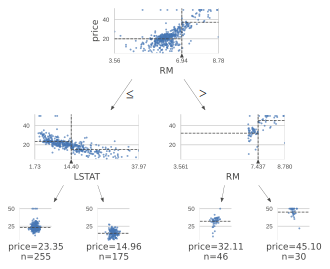

In [ ]:
from dtreeviz.trees import *
dtrЗ = DecisionTreeRegressor(max_depth=2)
dtrЗ.fit(X_train, Y_train )
viz = dtreeviz(
                              dtrЗ,
                              X,
                              Y,
                              target_name="price",
                              feature_names=df.iloc[:,0:13].columns
                              )
viz

**важность признака:**

In [ ]:
for col, val in sorted(
    zip (
         df.iloc[:,0:13].columns, dtr.feature_importances_
        ),
    key=lambda x: x[1],
    reverse=True,
) [: 5]:
    print(f"{col:10}{val:10.3f}")

RM             0.576
LSTAT          0.190
DIS            0.110
CRIM           0.058
PTRATIO        0.025


# **Случайный лес**

Деревья решений хороши тем, что они объяснимы, но имеют
тенденцию к переобучению. Случайный лес меняет часть
объяснимости на модель, которая лучше обобщает. Эта модель
также может быть использована для регрессии.

**Предварительная обработка данных
Необязательна**, если ввод числовой и нет пропущенных значений.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=100)

In [ ]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rfr.score(X_test,Y_test)

0.8708997131330258

Важность признака:

In [ ]:
for col, val in sorted(
    zip (
         df.iloc[:,0:13].columns, rfr.feature_importances_
        ),
    key=lambda x: x[1],
    reverse=True,
) [: 5]:
    print(f"{col:10}{val:10.3f}")

RM             0.440
LSTAT          0.380
DIS            0.066
CRIM           0.032
PTRATIO        0.019


# **Регрессия XGBoost**

это тоже дерево решений

Предварительная обработка данных
С моделями деревьев масштабирование не требуется. Категориальные
данные нужно кодировать. Есть поддержка для
пропущенных данных!

In [ ]:
import xgboost as xgb

In [ ]:
xgr = xgb.XGBRegressor(random_state=42)

In [ ]:
xgr.fit(X_train,Y_train)

[15:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [ ]:
xgr.score(X_test,Y_test)

0.8716794731224718

In [ ]:
xgr.predict(df.iloc[0,0:13]) # ПОЛУЧИЛИ 27, А ПО ФАКТУ 24

array([27.013563], dtype=float32)

Важности признаков для учащихся gbtree.
'gЬlin-
Важность признака - это среднее усиление по всем узлам,
в которых используется признак:

In [ ]:
for col, val in sorted(
    zip (
         df.iloc[:,0:13].columns, xgr.feature_importances_
        ),
    key=lambda x: x[1],
    reverse=True,
) [: 5]:
    print(f"{col:10}{val:10.3f}")

LSTAT          0.485
RM             0.263
PTRATIO        0.060
NOX            0.051
DIS            0.032


Библиотека XGBoost имеет графические объекты для важности
признака. Обратите внимание, что параметр priority_
type изменяет значения в этом графике (рис. 14.5). Стандартно
для определения важности признака используется вес:

In [ ]:
import matplotlib.pyplot as plt
import pydotplus
from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz
import xgboost as xgb

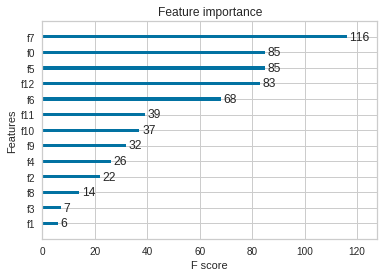

In [ ]:
fig, ax= plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax)

In [ ]:
fig.savefig("/content/gdrive/MyDrive/Colab Notebooks/наборы данных/mlpr_1405.png", dpi=300)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!pip install yellowbrick

In [ ]:
# библиотека визуализации
from yellowbrick.features import FeatureImportances

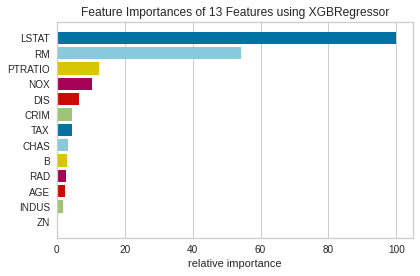

In [ ]:
from sklearn.ensemble import RandomForestClassifier
fig, ах= plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(xgr,labels=df.iloc[:,0:13].columns)
fi_viz.fit(X_train, Y_train)
fi_viz.poof ()
fig.savefig("/content/gdrive/MyDrive/Colab Notebooks/наборы данных/mlpr_1406.png", dpi=300)

Рис. 14.5. Важность признака с использованием веса (сколько
раз признак встретился в деревьях)

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
fig, ах= plt.subplots(figsize=(6, 4))
xgb.plot_tree(xgr, ах=ах, num_trees=0)
fig.savefig('/content/gdrive/MyDrive/Colab Notebooks/наборы данных/mlpr_l407.png', dpi=300)

# **Регрессия LightGBM**

Библиотека дерева градиентного бустинга LightGBM также
поддерживает регрессию. Как упомянуто в главе о классификации,
она может быть быстрее, чем XGBoost, из-за механизма
выборки, используемого для определения разделения узла.
Кроме того, помните, что глубина деревьев сначала растет,
поэтому ограничение глубины может повредить модели.

Предварительная обработка даннь~х
Имеет некоторую поддержку кодирования категориальных
столбцов в виде целых чисел (или тип Categorical библиотеки
pandas), но AUC, по-видимому, отстает по сравнению с унитарным
кодированием.

In [ ]:
import lightgbm as lgb
lgr_ = lgb.LGBMRegressor(random_state=42)
lgr_.fit(X_train,Y_train)
lgr_.score(X_test, Y_test)

0.847729219534575

In [ ]:
df.iloc[0,0:13]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [ ]:
lgr_.predict(X) # у нас 24, а получили 30.32

**Библиотека LightGBM поддерживает важность признака.**
**Ее расчет определяет параметр importance_type (стандартное
значение зависит от того, сколько раз был использован признак):**

In [ ]:
for col, val in sorted(
    zip (
         df.iloc[:,0:13].columns, lgr.feature_importances_
        ),
    key=lambda x: x[1],
    reverse=True,
) [: 5]:
    print(f"{col:10}{val:10.3f}")

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


**График важности признака, показывающий, сколько раз был использован признак (рис. 14.8):**

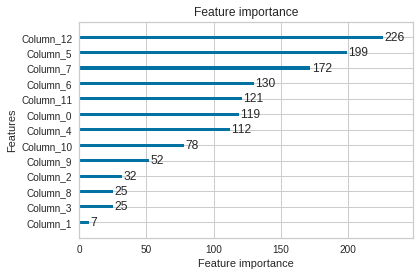

In [ ]:
fig, ax= plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgr_, ax=ax)
fig.tight_layout()
fig.savefig("/content/gdrive/MyDrive/Colab Notebooks/наборы данных/mlpr_l408.png", dpi=300)

Рис. 14.8. Важность признаков, показывающая, сколько раз был использован признак

# **Метрики и реrрессионная оценка**